In [1]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.dates as mdates
import datetime as dt

In [8]:
columns = ['Country', 'Date', 'SuspectedCases', 'ProbableCases', 'ConfirmedCases',\
           'AllCases', 'SuspectedDeaths', 'ProbableDeaths', 'ConfirmedDeaths', 'AllDeaths']
df = pd.read_csv("data/ebola_2014_2016_clean.csv", header=0, names=columns)

def PartOfTheWorld(country):
    """Эта функция отображает страну в часть света, где она находится. Будет удобно использовать при отсеивании стран с плохой статистикой"""
    
    if country == 'United States of America':
        return 'New World'
    elif country == 'Spain' or country == 'United Kingdom' or country == 'Spain' or country == 'Italy':
        return 'Europe'
    else:
        return 'Africa'
    
# Добавим колонку для удобства доступа
df['PartOfTheWorld'] = df['Country'].apply(PartOfTheWorld)
df.head()

,Country,Date,SuspectedCases,ProbableCases,ConfirmedCases,AllCases,SuspectedDeaths,ProbableDeaths,ConfirmedDeaths,AllDeaths,PartOfTheWorld
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0,Africa
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0,Africa
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0,Africa
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0,Africa
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0,Africa


Посмотрим на все страны с которыми имеем дело:

In [4]:
df['Country'].unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

In [5]:
african_countries = df.loc[df['PartOfTheWorld'] == 'Africa', 'Country'].unique()
european_countries = df.loc[df['PartOfTheWorld'] == 'Europe', 'Country'].unique()
american_countries = df.loc[df['PartOfTheWorld'] == 'New World', 'Country'].unique()

In [9]:
start_date = df.loc[df['PartOfTheWorld'] == 'Africa', 'Date'].min()
end_date = df.loc[df['PartOfTheWorld'] == 'Africa', 'Date'].max()

date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d')
date_range

Index(['2014-08-29', '2014-08-30', '2014-08-31', '2014-09-01', '2014-09-02',
       '2014-09-03', '2014-09-04', '2014-09-05'],
      dtype='object')

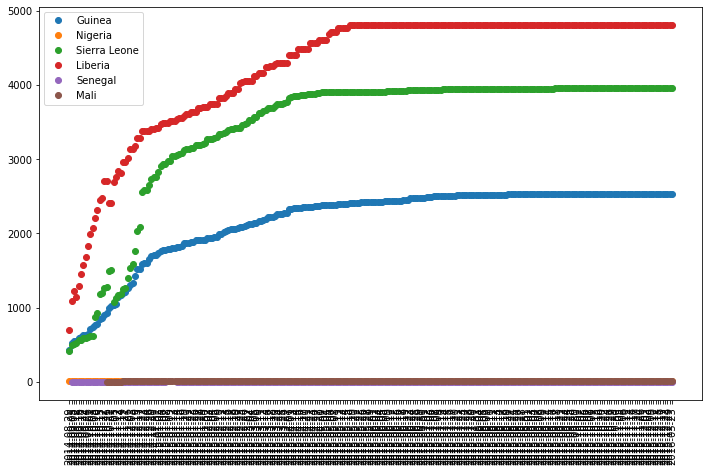

In [18]:
fig = plt.figure(figsize=(10, 6))

for state in african_countries:
    state_data = df.loc[df['Country'] == state].groupby(['Date']).sum()
    plt.plot_date(state_data.index, state_data['AllDeaths'], label=state)

plt.tight_layout()
plt.xticks(rotation=90)
plt.legend()
plt.show()

Примерно поняли какие страны лучше пока оставим в покое. США и Европа заведомо имеют слабую статистику. Работаем пока со следующими:

In [14]:
desired_states = ['Sierra Leone', 'Liberia', 'Guinea']

Опустим хвост датасета, потому как оцениваем худший случай

Дальнейшие действия: 
0. Понять, почему там в данных количество смертей убывает ?????
1. Убрать хвост датасета, чтобы не смущать регрессор

2. Попробовать разные модели: взять логарифм от числа смертей и построить линейную регрессию, интерполяцию полиномом

3. Построить графики взаимосвязи количества случаев заражений и количества смертей, посчитать для каждой из "хороших" стран коэффициент

4. Предсказать коэффициент для страны с "плохой" статистикой, построить графики

In [19]:
def predict_case_death_coefficient(deaths, cases, date_range):
    # Не успел :С
    pass

def predict_cases(deaths, date_range):
    # Не успел :С
    pass